### Read JSON-formatted RDT data to df

In [7]:
using DataFrames, Dates, JSON, CSV
using NativeFileDialog

JSon_file = pick_file("E:\\Card Data\\", filterlist="*csv")

println("Reading JSON-formatted data from ",JSon_file)
flush(stdout)

# Read the CSV file into a DataFrame
json_df = CSV.read(JSon_file, DataFrame)

# Ensure the Date column is correctly parsed
json_df.Date = DateTime.(json_df.Date, dateformat"\"yyyy-mm-ddTHH:MM:SS\"")

@time begin

    # Parse JSON strings back into arrays
    displacement_df = DataFrame(
        Date = json_df.Date,
        Heave = JSON.parse.(json_df.Heave),
        North = JSON.parse.(json_df.North),
        West = JSON.parse.(json_df.West),
        f2 = JSON.parse.(json_df.f2),
        Pden2 = JSON.parse.(json_df.Pden2),
    )
    
    [displacement_df[!, n] = convert.(Array{Float64,1}, displacement_df[!, n]) for n in names(displacement_df)[2:end]]

end

# Display the DataFrame
displacement_df

Row,Date,Heave,North,West,f2,Pden2
,DateTime,Array…,Array…,Array…,Array…,Array…
1,2008-08-27T01:16:00,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 … -0.09, -0.02, 0.26, -0.1, -0.1, -0.08, 0.08, -0.01, -0.17, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 … 0.92, 0.94, 0.92, 1.04, 1.0, 1.02, 1.02, 1.08, 1.1, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 … 1.29, 1.17, 1.19, 1.14, 1.13, 1.0, 0.98, 0.95, 0.83, 0.0]","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045 … 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64]","[0.000319684, 0.00888301, 0.028221, 0.0132473, 0.0116721, 0.00896937, 0.00687144, 0.00439924, 0.00372764, 0.00174619 … 0.00150438, 0.00137609, 0.00152622, 0.00214066, 0.0025798, 0.00127272, 0.00171964, 0.00232294, 0.0014056, 0.000687357]"
2,2008-08-27T01:43:00,"[0.07, 0.08, -0.13, -0.1, 0.26, 0.05, 0.02, -0.13, -0.05, 0.26 … 0.1, 0.05, -0.12, -0.07, -0.13, 0.1, 0.2, 0.0, 0.03, 0.0]","[1.16, 1.2, 1.3, 1.3, 1.28, 1.34, 1.32, 1.46, 1.54, 1.58 … 0.0, -0.04, 0.0, 0.0, 0.0, 0.04, 0.08, 0.06, 0.08, 0.0]","[0.76, 0.61, 0.58, 0.47, 0.51, 0.47, 0.41, 0.28, 0.08, -0.01 … 0.04, 0.1, 0.12, 0.2, 0.06, 0.09, 0.34, 0.31, 0.53, 0.0]","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045 … 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64]","[0.00227862, 0.112268, 0.436969, 0.315387, 0.145158, 0.0571374, 0.0212267, 0.0104232, 0.00825563, 0.00595957 … 0.00304243, 0.00225253, 0.00192675, 0.00221714, 0.0031509, 0.00196678, 0.00218711, 0.00230833, 0.00222, 0.00171808]"
3,2008-08-27T02:13:00,"[-0.04, 0.11, 0.05, -0.13, -0.05, 0.03, 0.1, 0.0, -0.3, -0.21 … 0.01, 0.16, 0.19, -0.09, -0.12, -0.03, 0.08, 0.2, 0.01, 0.0]","[0.1, 0.18, 0.18, 0.14, 0.18, 0.18, 0.26, 0.16, 0.16, 0.18 … 0.1, 0.0, 0.02, -0.12, -0.12, -0.02, 0.04, 0.1, 0.08, 0.0]","[0.39, 0.4, 0.52, 0.33, 0.39, 0.27, 0.38, 0.41, 0.09, -0.06 … -0.48, -0.29, -0.16, -0.2, -0.2, -0.29, -0.11, 0.12, 0.07, 0.0]","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045 … 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64]","[7.54438e-5, 0.00226595, 0.00922843, 0.00719753, 0.00372907, 0.00215277, 0.000977487, 0.000481512, 0.000499399, 0.000399579 … 0.00323718, 0.00401405, 0.00549538, 0.00415244, 0.00292227, 0.00381119, 0.00336742, 0.00402891, 0.00412226, 0.00193779]"
4,2008-08-27T02:43:00,"[-0.06, -0.06, 0.05, -0.12, -0.09, 0.05, 0.28, -0.05, -0.24, -0.06 … 0.07, 0.1, -0.12, -0.17, 0.03, 0.23, 0.1, 0.13, 0.0, 0.0]","[0.02, 0.08, 0.2, 0.2, 0.18, 0.08, 0.04, -0.02, -0.14, -0.08 … 0.0, -0.16, -0.2, -0.18, -0.1, -0.06, -0.22, -0.2, -0.16, 0.0]","[0.05, -0.07, 0.08, 0.05, -0.09, -0.23, -0.04, 0.02, -0.1, -0.14 … -0.08, 0.0, -0.1, -0.32, -0.35, -0.32, -0.38, -0.26, -0.43, 0.0]","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045 … 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64]","[5.85998e-5, 0.00318866, 0.0107129, 0.0106624, 0.00749522, 0.00267222, 0.000991224, 0.000694717, 0.000393855, 0.000346421 … 0.00417915, 0.00437091, 0.00462768, 0.00446198, 0.00634012, 0.00506012, 0.00538303, 0.00784266, 0.0110227, 0.00631128]"
5,2008-08-27T03:13:00,"[0.06, 0.0, -0.04, 0.15, 0.26, 0.06, -0.17, 0.0, 0.16, 0.05 … 0.25, 0.0, -0.09, -0.01, 0.11, 0.06, -0.04, -0.03, 0.01, -9.82]","[-0.16, 0.02, -0.08, 0.02, 0.0, 0.06, 0.14, 0.22, 0.2, 0.14 … 0.0, -0.02, -0.04, -0.12, -0.1, -0.22, -0.24, -0.24, -0.12, 0.0]","[-0.37, -0.43, -0.59, -0.42, -0.35, -0.14, -0.15, -0.21, -0.04, -0.03 … -0.07, -0.03, -0.1, 0.05, -0.11, 0.09, 0.02, 0.03, 0.0, 0.0]","[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045 … 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64]","[7.76651e-5, 0.00319423, 0.0101294, 0.00864463, 0.00333699, 0.00142477, 0.000483838, 0.000288556, 0.000224278, 0.000140176 … 0.00621794, 0.00695301, 0.00572297, 0.00683107, 0.00661475, 0.00622738, 0.00690867, 0.00937072, 0.00769174, 0.0033771]"
6,2008-08-27T03:43:00,"[0.05, 0.02, 0.03, 0.15, -0.06, -0.05, -0.01, 0.12, -0

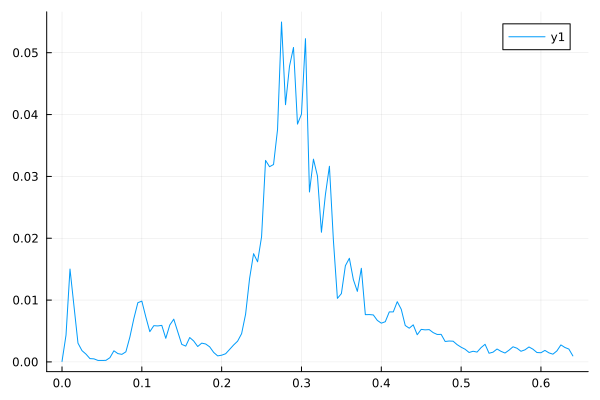

In [8]:
using Plots

plot(xdisplacement_df.f2[1000], xdisplacement_df.Pden2[1000])